In [1]:
class Neuron:

    def __init__(self):
        self.w = 1.0  # 가중치를 초기화합니다
        self.b = 1.0  # 절편을 초기화합니다

    def forpass(self, x):
        y_hat = x * self.w + self.b  # 직선 방정식을 계산합니다
        return y_hat

    def backprop(self, x, err):
        w_grad = x * err  # 가중치에 대한 그래디언트를 계산합니다
        b_grad = 1 * err  # 절편에 대한 그래디언트를 계산합니다
        return w_grad, b_grad

    def fit(self, x, y, epochs=1):
        for i in range(epochs):  # 에포크만큼 반복합니다
            for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다
                y_hat = self.forpass(x_i)  # 정방향 계산
                err = -(y_i - y_hat)  # 오차 계산
                w_grad, b_grad = self.backprop(x_i, err)  # 역방향 계산
                self.w -= w_grad  # 가중치 업데이트
                self.b -= b_grad  # 절편 업데이트

In [8]:
import numpy as np

x = np.array([1, 2, 3, 1, 1, 2])
y = np.array([1, 2, 1, 1, 1, 1])

# neuron = Neuron()
# neuron.fit(x, y)

self_w = 1.  # 가중치 초기화
self_b = 1.

batch_size = 2
start = 0
cnt = 0
for batch_count in range(len(x) / batch_size):
    for x_i, y_i in zip(x, y):  # 모든 샘플에 대해 반복합니다.
        y_hat = x * self_w + self_b  # 정방향계산, 직선 방정식을 계산합니다.
        err = -(y_i - y_hat)

        w_grad = x_i * err  # 역방향 미분
        b_grad = 1 * err  # 역방향 미분

        self_w -= w_grad
        self_b -= b_grad
        start += batch_size
        cnt += 1

print(cnt)
self_w, self_b

(array([  19.,  828., 8619.,   19.,   19.,  828.]),
 array([  12.,  361., 3790.,   12.,   12.,  361.]))

- batch_size는 한번에 불러오는 데이터의 갯수이고, 이 batch_size 단위로 w, b의 갱신이 이루어짐
- x_data가 6개일 때 batch_size=1이면 1개의 데이터 읽어서 오차계산 w, b 갱신하고 2, 3, 4, ... 총 6번의 갱신
- batch_size=3이면 총 2번의 w, b의 갱신이 이루어짐
- epoch 한번 당 w, b갱신이 이루어짐

In [9]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [10]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [11]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [12]:
import matplotlib.pyplot as plt

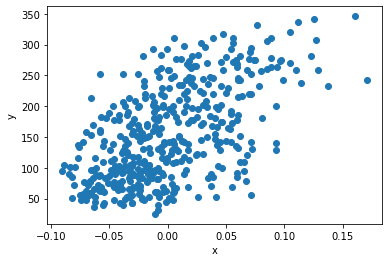

In [13]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [14]:
x = diabetes.data[:, 2]
y = diabetes.target

In [15]:
x_sample = x[99:109]
print(x_sample, x_sample.shape)

[-0.06440781  0.01750591 -0.04500719  0.02828403  0.04121778  0.06492964
 -0.03207344 -0.07626374  0.04984027  0.04552903] (10,)
